## Data Description:
**Car_Name:** Name of the cars.<br>
**Year:** Year of the car when it was bought.<br>
**Selling_Price:** Price at which the car is being sold.<br>
**Present_Price:** Current ex-showroom price of the car.<br>
**Kms_Driven:** Distance completed by the car in km.<br>
**Fuel_Type:** Fuel type of the car.<br>
**Seller_Type:** Tells if a Seller is Individual or a Dealer.<br>
**Transmission:** Gear transmission of the car (Automatic/Manual).

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Exploratory Data Analysis](#eda)**
    - 2.3 - **[Outlier Treatment](#outlier)**
    - 2.4 - **[Missing Value Treatment](#null)**
    - 2.5 - **[Encoding](#enc)**
    - 2.6 - **[Splitting the data into Train and Test](#spl)**
3.  **[Build the MLR Model](#model)** 
     - 3.1 - **[MLR Full Model](#model)**
     - 3.2 - **[MLR Model after Removing Insignificant Variables](#signi_var)**

<a id="lib"></a>
## 1. Import Libraries

In [2]:
## Importing libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

<a id="prep"></a>
## 2. Data Preparation

In [4]:
os.chdir("C:/Users/HP/OneDrive/Desktop/Machine Learning/Linear_Regression/assigment case study (CARS )")
dataset = pd.read_csv("car data.csv")

In [6]:
## Showing few rows of dataset
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<a id="read"></a>
# 2.1. Understand the data

In [5]:
#The info command will help us to understand the different columns present in the dataset and its datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


###### **Since there is no missing entries in the dataset and datatypes of all columns are correct.** 

In [8]:
#Len command will help us understand the total number of records present in the dataset
len(dataset)

301

In [9]:
#.columns command will help us understand the columns present in the dataset
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
#The below command will help us understand the total number of columns present in the dataset
len(dataset.columns)

9

<a id="eda"></a>
# 2.2. Exploratory Data Analysis

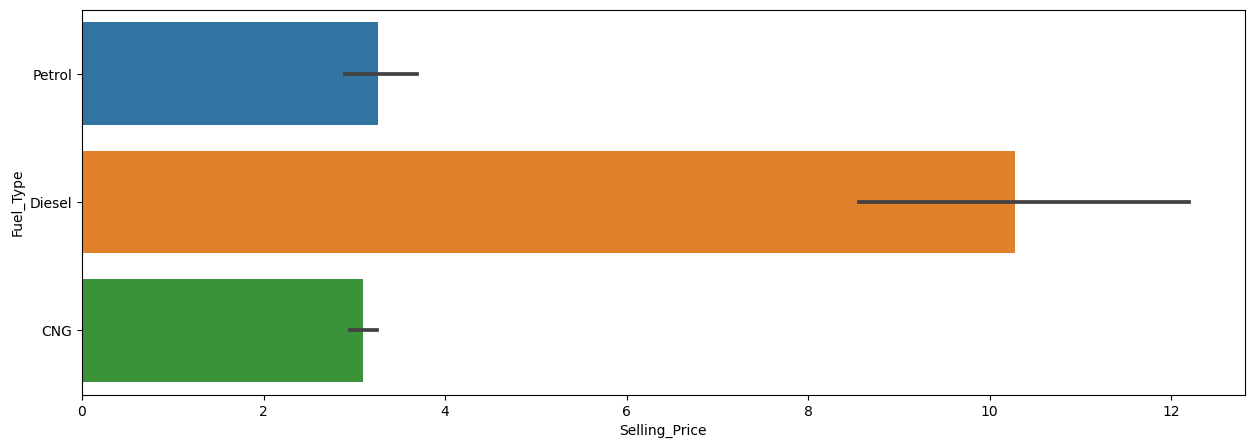

In [19]:
## Fuel_Type vs selling_Price
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Fuel_Type',x='Selling_Price')
plt.show()

**Diesel cars are having higher selling price**

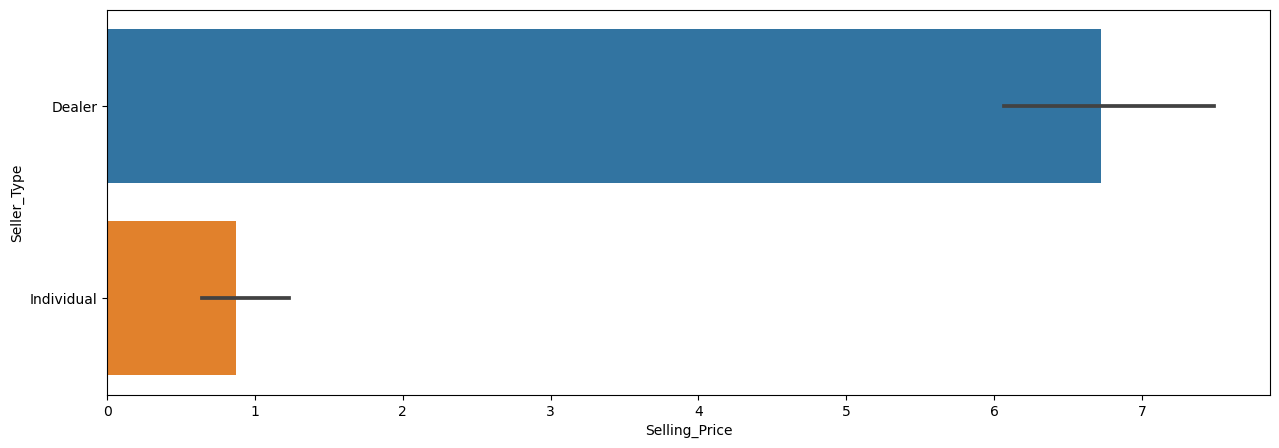

In [20]:
## Seller_Type vs Selling_Price
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Seller_Type',x='Selling_Price')
plt.show()

**Dealers are having higher selling price.**

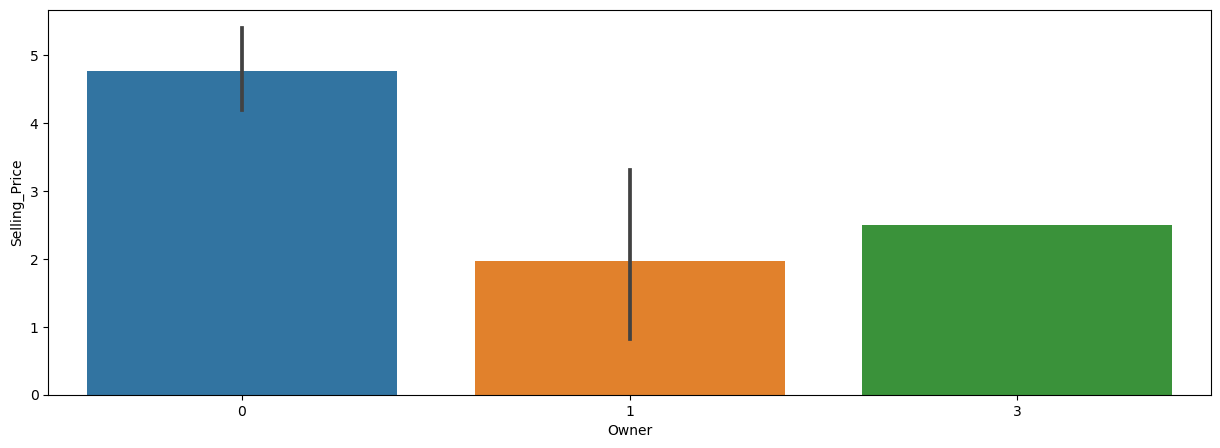

In [22]:
## Owner vs Selling_Price
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, x = 'Owner', y='Selling_Price')
plt.show()

**Cars with 0 owner are having higher price**

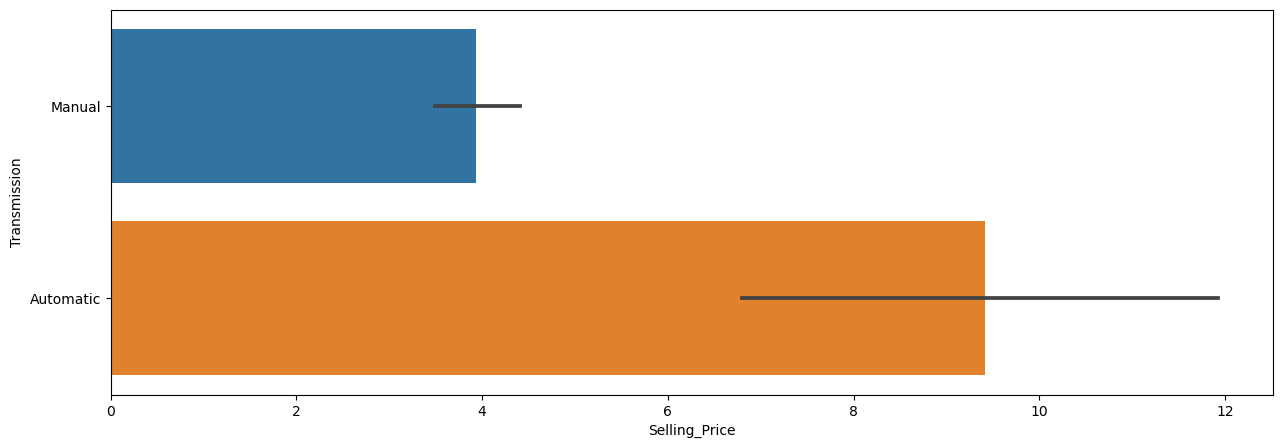

In [23]:
## Transmission vs Selling_Price
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Transmission',x='Selling_Price')
plt.show()

**Automatic Cars are having higher selling price**

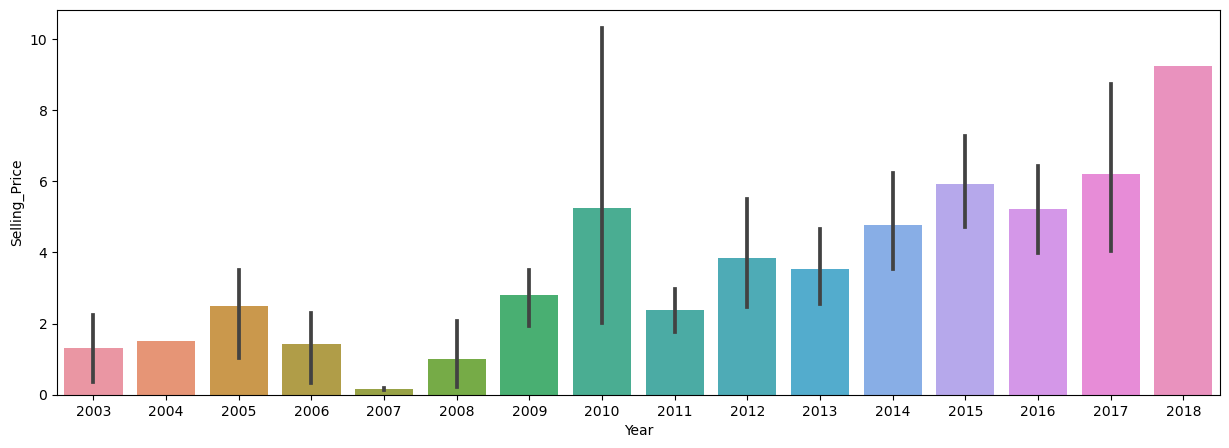

In [24]:
## Year vs Selling_Price
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, x = 'Year',y='Selling_Price')
plt.show()

**Newer the car is, higher the selling price it will have**

<Figure size 1500x500 with 0 Axes>

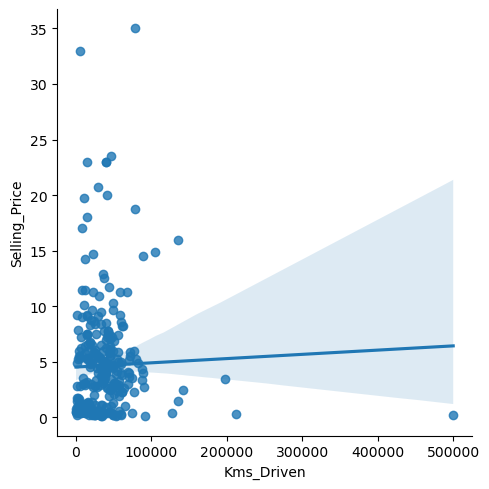

In [25]:
## Kms_Driven vs Selling_Price
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset, x = 'Kms_Driven',y='Selling_Price')
plt.show()

**If the Kilometer driven are lesser more the selling price is High**

<Figure size 1500x500 with 0 Axes>

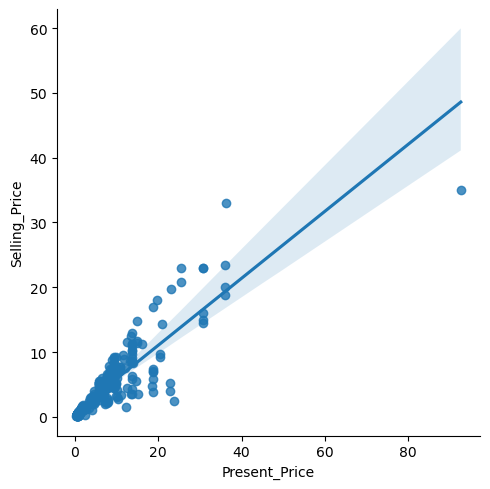

In [27]:
## Present_Price vs Selling_Price
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset, x = 'Present_Price',y='Selling_Price')
plt.show()

<a id="outlier"></a>
# 2.3. Outlier Treatment

In [28]:
#Outlier Treatment
def outlier_treatment(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    df_rem_out = dataframe[~((dataframe < (Q1 - 1.5*IQR))| (dataframe > (Q3 + 1.5*IQR))).any(axis=1)]
    return df_rem_out

dataset = outlier_treatment(dataset)

In [29]:
len(dataset)

264

**There were outliers in the dataset as before outliers treatment the length of dataset was 301 and after outliers treatment is 264.** 

<a id="null"></a>
# 2.4. Missing Value Treatment

In [30]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

**In this dataset there are no missing values so we are good to proceed to the next steps.**

# <a id="enc"></a>
# 2.5. Encoding

In [32]:
# Separating the numerical and categorical columns
def data_type(dataset):
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

In [33]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,2014,3.35,5.59,27000,2,0,1,0
1,84,2013,4.75,9.54,43000,1,0,1,0
2,61,2017,7.25,9.85,6900,2,0,1,0
3,87,2011,2.85,4.15,5200,2,0,1,0
4,83,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,62,2016,9.50,11.60,33988,1,0,1,0
297,60,2015,4.00,5.90,60000,2,0,1,0
298,62,2009,3.35,11.00,87934,2,0,1,0
299,62,2017,11.50,12.50,9000,1,0,1,0


<a id="spl"></a>
# 2.6. Splitting the data into Train and Test

In [34]:
x = dataset.iloc[:,[1,3,4,5,6,7,8]].values

In [36]:
y=dataset.iloc[:,2].values

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [39]:
from sklearn.linear_model import LinearRegression

# Fitting the model
regressor_ini = LinearRegression()
regressor_ini.fit(x_train, y_train)

# Returning the R^2 for the model
regressor_ini_R2 = regressor_ini.score(x_train, y_train)
print('R^2: {0}'.format(regressor_ini_R2))

R^2: 0.859757209118197


In [40]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [41]:
def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


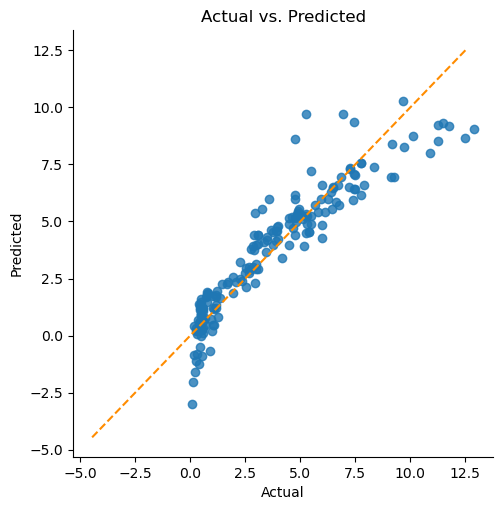

In [42]:
linear_assumption(regressor_ini, x_train, y_train)

In [43]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 3.923505573000475e-09
Residuals are not normally distributed


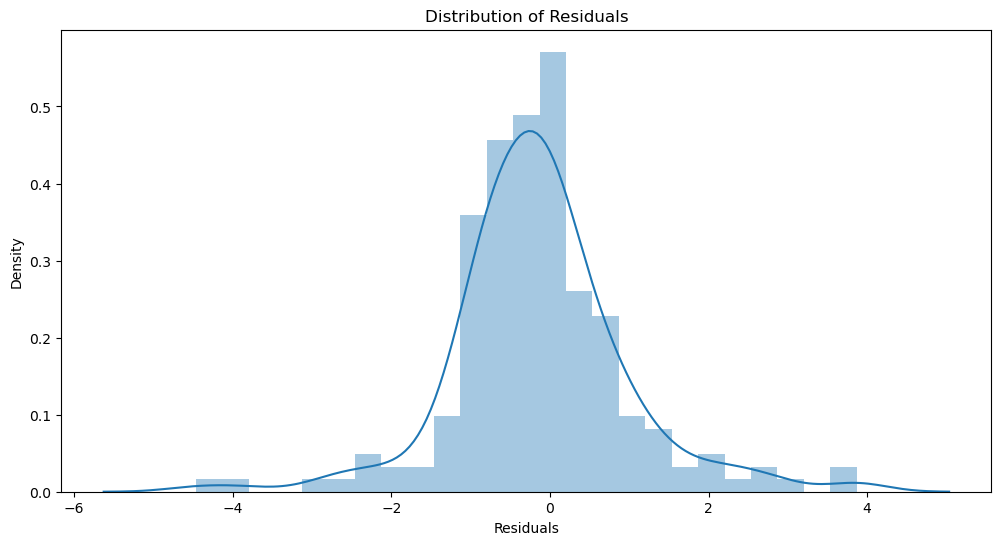


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [44]:
normal_errors_assumption(regressor_ini, x_train, y_train)

In [45]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


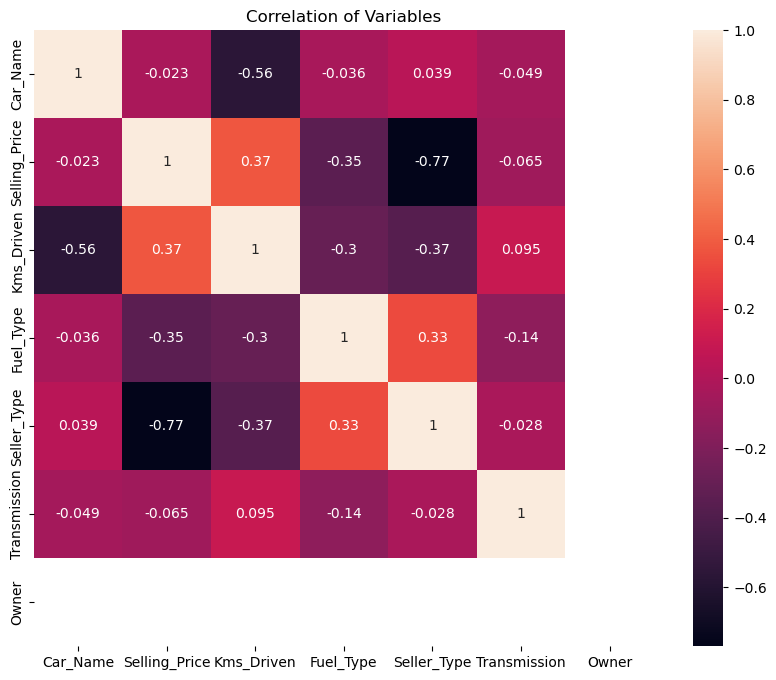

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Car_Name: 58.176192200060285
Selling_Price: 6.601698694467492
Kms_Driven: 4.307839132933036
Fuel_Type: 25.08402203097378
Seller_Type: 4.0263319849126535
Transmission: 11.416335170024455
Owner: nan

3 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [46]:
multicollinearity_assumption(regressor_ini, x_train, y_train, dataset.iloc[:,[0,2,4,5,6,7,8]].columns.values)

In [47]:
def autocorrelation_assumption(model, features, label):
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [48]:
autocorrelation_assumption(regressor_ini, x_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0584311036751295
Little to no autocorrelation 

Assumption satisfied


In [49]:
def homoscedasticity_assumption(model, features, label):
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


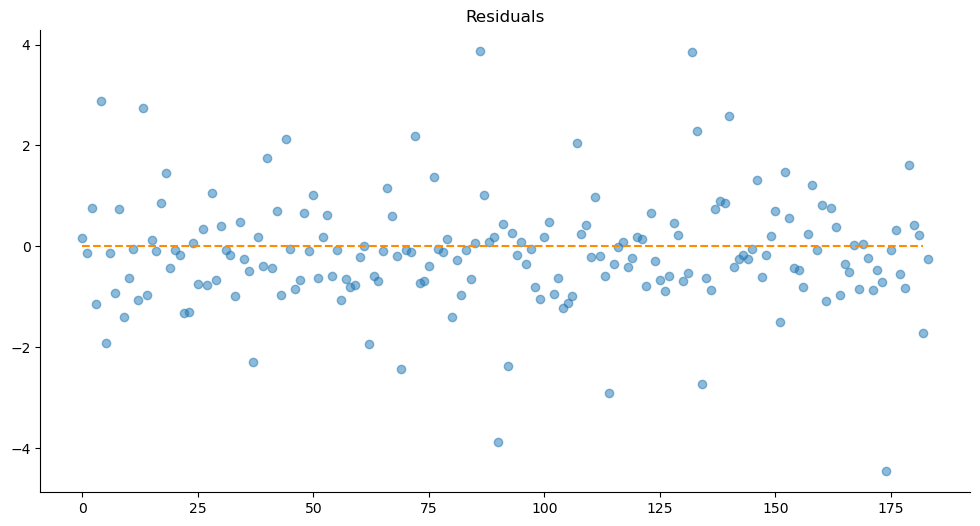

In [50]:
homoscedasticity_assumption(regressor_ini, x_train, y_train)

<a id="model"></a>
# 3. Building the MLR Model

In [53]:
x_train.shape

(184, 8)

In [52]:
#Adding the constant 1 to get the Y-Intercept value
x_train = np.append(arr=x_train, values = np.ones((184,1)).astype(int), axis=1)

In [56]:
x_test.shape

(80, 8)

In [55]:
#Adding the constant 1 to get the Y-Intercept value
x_test = np.append(arr=x_test, values = np.ones((80,1)).astype(int), axis=1)

In [57]:
import statsmodels.api as sm

In [58]:
regressor_ini = sm.OLS(endog=y_train, exog=x_train).fit()

In [59]:
regressor_ini.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     180.8
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           9.48e-73
Time:                        14:02:04   Log-Likelihood:                -285.31
No. Observations:                 184   AIC:                             584.6
Df Residuals:                     177   BIC:                             607.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2798      0.045      6.267      0.000       0.192       0.368
x2             0.4699      0.030     15.690      0.000       0.411       0.529
x3         -1.949e-05   6.05e-06     -3.224      0.002   -3.14e-05   -7.56e-06
x4            -0.7796      0.235     -3.312      0.001      -1.244      -0.315
x5            -1.3233      0.283     -4.669      0.000      -1.883      -0.764
x6             0.3427      0.304      1.127      0.261      -0.257       0.943
const               0          0        nan        nan           0           0
x7          -560.3251     90.115     -6.218      0.000    -738.163    -382.487
==============================================================================
Omnibus:                       16.864   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.371
Skew:                           0.208   Prob(JB):                     7.00e-12
Kurtosis:                       5.555   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
y_pred_ini = regressor_ini.predict(x_test)

In [61]:
y_pred_ini

array([ 1.57925354,  1.08714561,  1.99529044,  1.35553308,  2.0735102 ,
        6.04273541,  0.48993696,  4.69063736,  3.29985273,  3.82575259,
        6.43193428,  4.640003  , -0.25136753,  5.15683705,  4.51096034,
        1.30894704,  1.67196885,  2.12980479,  8.18642194,  3.88555788,
        0.78869369,  3.06279128,  4.77325512,  6.93052638,  8.14063603,
        8.78512818,  8.13072296,  8.12773299,  5.1098852 ,  5.90478519,
        4.05880681,  8.04254019,  6.28301753,  5.94962614,  5.44009297,
       -0.96695171, 10.12321415,  4.13289943,  7.88768311,  7.6117296 ,
        8.19032091,  0.01550171,  9.59130217,  5.47049941,  4.35182576,
        0.94013392,  5.12876761, -1.81663528,  0.71316297,  8.63887841,
        5.80254873,  1.2095756 , -0.18139262,  1.59311134,  0.99373804,
        7.93206421,  3.61016685,  8.13337002,  5.6928281 ,  6.80843335,
        4.4115054 ,  8.01096844,  5.67762213,  2.68656233,  6.31872592,
        7.12455478,  1.66953358,  8.95145489,  4.79514033,  0.41

<a id="signi_var"></a>
# 3.2 MLR Model after Removing Insignificant Variables

In [62]:
x = dataset.iloc[:,[1,3,4,5,6,8]].values
y = dataset.iloc[:,2].values

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [64]:
regressor_tuned = sm.OLS(endog=y_train, exog=x_train).fit()

In [65]:
y_pred_tuned = regressor_tuned.predict(x_test)

In [66]:
regressor_tuned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              484.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                   5.23e-102
Time:                        14:08:10   Log-Likelihood:                         -298.54
No. Observations:                 184   AIC:                                      607.1
Df Residuals:                     179   BIC:                                      623.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0027      0.000      9.729      0.000       0.002       0.003
x2             0.3905      0.030     13.022      0.000       0.331       0.450
x3         -3.535e-05   4.99e-06     -7.082      0.000   -4.52e-05   -2.55e-05
x4            -1.2486      0.239     -5.219      0.000      -1.721      -0.776
x5            -1.8707      0.295     -6.331      0.000      -2.454      -1.288
const               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       18.441   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.997
Skew:                           0.064   Prob(JB):                     3.83e-16
Kurtosis:                       6.040   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **RESULT:-**  R2 before tunning 0.859 and R2 after tunning 0.931. Adjusted R2 before tunning 0.855 and adjusted R2 after tunning 0.929.Therefore there is an increase in accuracy.

## **Overall there is a good increase in the R2 and Adjusted R2 values in the tuned model.**